In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt

In [2]:
#Read the csv file
live_stock = pd.read_csv("GLEAM_LivestockEmissions.csv")
live_stock

,Region,Animal species,Production system,Commodity,Emission Intensity (kg CO2e per kg protein),Production (kg protein),Total GHG emissions (kg CO2e),Total CO2 emissions (kg CO2e),Total CH4 emissions (kg CO2e),Total N2O emissions (kg CO2e),...,"Feed: fertilizer & crop residues, N2O (kg CO2e)","Feed: applied & deposited manure, N2O (kg CO2e)","LUC: soy & palm, CO2 (kg CO2e)","LUC: pasture expansion, CO2 (kg CO2e)","Enteric fermentation, CH4 (kg CO2e)","Manure management, CH4 (kg CO2e)","Manure management, N2O (kg CO2e)","Direct energy, CO2 (kg CO2e)","Indirect energy, CO2 (kg CO2e)","Postfarm, CO2 (kg CO2e)"
0,Global,Cattle,Aggregated,Aggregated,160.3,2.916310e+10,4.674630e+12,9.449299e+11,2.648727e+12,1.080973e+12,...,1.740732e+11,7.419864e+11,4.687954e+10,3.870062e+11,2.509275e+12,1.394522e+11,1.649130e+11,4.215542e+10,1.585653e+10,9.955932e+10
1,Global,Cattle,Aggregated,Milk,86.7,1.888089e+10,1.637519e+12,2.756914e+11,9.676442e+11,3.941834e+11,...,7.166208e+10,2.543885e+11,1.497421e+10,NaN,8.856352e+11,8.200906e+10,6.813278e+10,2.993485e+10,3.252889e+09,8.929544e+10
2,Global,Cattle,Aggregated,Meat,295.4,1.028222e+10,3.037111e+12,6.692385e+11,1.681083e+12,6.867892e+11,...,1.024111e+11,4.875979e+11,3.190534e+10,3.870062e+11,1.623640e+12,5.744310e+10,9.678019e+10,1.222057e+10,1.260364e+10,1.026388e+10
3,Global,Cattle,Grassland systems,Aggregated,206.3,1.033817e+10,2.133054e+12,5.628062e+11,1.052965e+12,5.172829e+11,...,5.253660e+10,4.267612e+11,8.194330e+09,3.870062e+11,9.969096e+11,5.605552e+10,3.798508e+10,1.417326e+10,4.303272e+09,3.773092e+10
4,Global,Cattle,Grassland systems,Milk,95.0,6.940654e+09,6.592844e+11,9.286140e+10,3.713461e+11,1.950770e+11,...,2.156126e+10,1.587838e+11,2.412100e+09,NaN,3.369018e+11,3.444428e+10,1.473188e+10,1.078605e+10,9.998435e+08,3.462338e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,Western Europe,Chicken,Layers,Aggregated,22.0,6.025046e+08,1.323780e+10,9.323248e+09,3.332783e+08,3.581273e+09,...,1.730664e+09,8.947222e+08,3.772893e+09,NaN,NaN,3.332783e+08,9.558861e+08,5.803359e+08,3.967689e+07,9.548171e+08
579,Western Europe,Chicken,Layers,Eggs,21.9,5.681959e+08,1.243977e+10,8.761355e+09,3.119144e+08,3.366500e+09,...,1.627899e+09,8.506486e+08,3.553528e+09,NaN,NaN,3.119144e+08,8.879524e+08,5.388376e+08,3.661863e+07,8.973380e+08
580,Western Europe,Chicken,Layers,Meat,23.3,3.430870e+07,7.980299e+08,5.618929e+08,2.136393e+07,2.147731e+08,...,1.027658e+08,4.407360e+07,2.193647e+08,NaN,NaN,2.136393e+07,6.793370e+07,4.149825e+07,3.058259e+06,5.747911e+07
581,Western Europe,Chicken,Broilers,Aggregated,31.4,9.068378e+08,2.843091e+10,2.197089e+10,4.295646e+08,6.030449e+09,...,3.519630e+09,1.680583e+09,9.587620e+09,NaN,NaN,4.295646e+08,8.302351e+08,2.679845e+09,4.823241e+08,1.516810e+09


In [3]:
#Printing all the columns
live_stock.columns

Index(['Region', 'Animal species', 'Production system', 'Commodity',
       'Emission Intensity (kg CO2e per kg protein)',
       'Production (kg protein)', 'Total GHG emissions (kg CO2e)',
       'Total CO2 emissions (kg CO2e)', 'Total CH4 emissions (kg CO2e)',
       'Total N2O emissions (kg CO2e)', 'Feed, CO2 (kg CO2e)',
       'Feed, CH4 (kg CO2e)',
       'Feed: fertilizer & crop residues, N2O (kg CO2e)',
       'Feed: applied & deposited manure, N2O (kg CO2e)',
       'LUC: soy & palm, CO2 (kg CO2e)',
       'LUC: pasture expansion, CO2 (kg CO2e)',
       'Enteric fermentation, CH4 (kg CO2e)',
       'Manure management, CH4 (kg CO2e)', 'Manure management, N2O (kg CO2e)',
       'Direct energy, CO2 (kg CO2e)', 'Indirect energy, CO2 (kg CO2e)',
       'Postfarm, CO2 (kg CO2e)'],
      dtype='object')

In [4]:
#Removing unnecessary columns form dataset
live_stock_subset = live_stock[['Region', 'Animal species', 'Production system', 'Commodity',
       'Emission Intensity (kg CO2e per kg protein)']]

live_stock_subset

,Region,Animal species,Production system,Commodity,Emission Intensity (kg CO2e per kg protein)
0,Global,Cattle,Aggregated,Aggregated,160.3
1,Global,Cattle,Aggregated,Milk,86.7
2,Global,Cattle,Aggregated,Meat,295.4
3,Global,Cattle,Grassland systems,Aggregated,206.3
4,Global,Cattle,Grassland systems,Milk,95.0
...,...,...,...,...,...
578,Western Europe,Chicken,Layers,Aggregated,22.0
579,Western Europe,Chicken,Layers,Eggs,21.9
580,Western Europe,Chicken,Layers,Meat,23.3
581,Western Europe,Chicken,Broilers,Aggregated,31.4


# 1. Detecting Null values

In [5]:
live_stock_subset.isnull().sum()

Region                                         0
Animal species                                 0
Production system                              0
Commodity                                      0
Emission Intensity (kg CO2e per kg protein)    0
dtype: int64

In [10]:
#Describe the dataset
live_stock_subset.describe()

,Emission Intensity (kg CO2e per kg protein)
count,583.000000
mean,122.485592
std,111.781524
min,0.000000
25%,37.600000
50%,89.500000
75%,177.000000
max,643.800000


In [11]:
print(live_stock_subset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 5 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Region                                       583 non-null    object 
 1   Animal species                               583 non-null    object 
 2   Production system                            583 non-null    object 
 3   Commodity                                    583 non-null    object 
 4   Emission Intensity (kg CO2e per kg protein)  583 non-null    float64
dtypes: float64(1), object(4)
memory usage: 22.9+ KB
None


In [7]:
#show data types of all the columns
live_stock_subset.dtypes

Region                                          object
Animal species                                  object
Production system                               object
Commodity                                       object
Emission Intensity (kg CO2e per kg protein)    float64
dtype: object

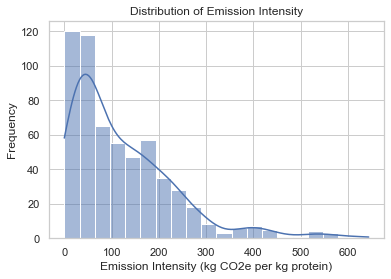

In [22]:
sns.histplot(live_stock_subset['Emission Intensity (kg CO2e per kg protein)'], bins=20, kde=True)
plt.xlabel('Emission Intensity (kg CO2e per kg protein)')
plt.ylabel('Frequency')
plt.title('Distribution of Emission Intensity')
plt.show()

## Creating counter plots for each qualitative variables

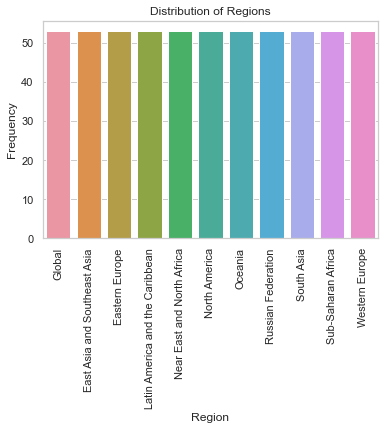

In [27]:
# Create a counting plot for the 'Region' column
sns.countplot(x='Region', data=live_stock_subset)
plt.title('Distribution of Regions')
plt.xlabel('Region')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  #Turing angle of the labels.
plt.show()


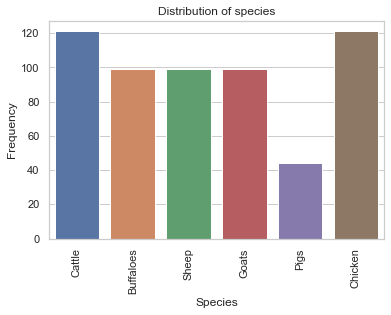

In [29]:
# Create a counting plot for the 'Animal species' column
sns.countplot(x='Animal species', data=live_stock_subset)
plt.title('Distribution of species')
plt.xlabel('Species')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  #Turing angle of the labels.
plt.show()

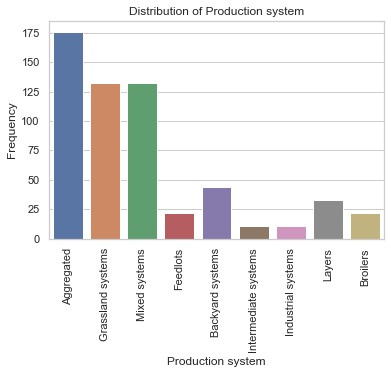

In [30]:
# Create a counting plot for the 'Production system' column
sns.countplot(x='Production system', data=live_stock_subset)
plt.title('Distribution of Production system')
plt.xlabel('Production system')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  #Turing angle of the labels.
plt.show()

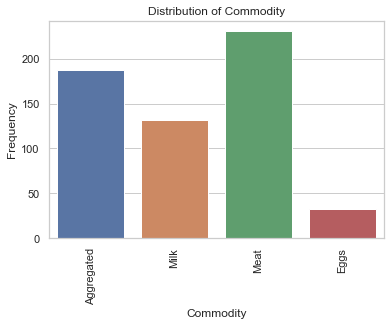

In [31]:
# Create a counting plot for the 'Commodity' column
sns.countplot(x='Commodity', data=live_stock_subset)
plt.title('Distribution of Commodity')
plt.xlabel('Commodity')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  #Turing angle of the labels.
plt.show()

## Analyze the Emission intensity group wise

Region
East Asia and Southeast Asia       182.566038
Eastern Europe                      67.654717
Global                             151.718868
Latin America and the Caribbean    161.771698
Near East and North Africa         175.401887
North America                       75.560377
Oceania                             78.583019
Russian Federation                  81.577358
South Asia                         175.066038
Sub-Saharan Africa                 133.349057
Western Europe                      64.092453
Name: Emission Intensity (kg CO2e per kg protein), dtype: float64


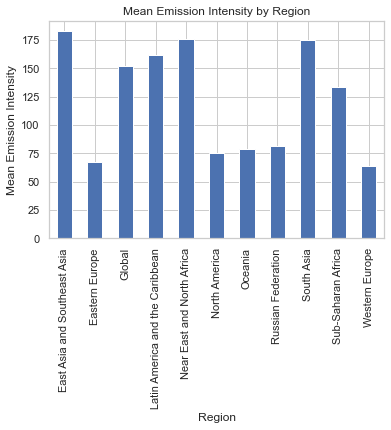

In [35]:
# Group by 'Region' and calculate mean emission intensity
region_mean_intensity = live_stock_subset.groupby('Region')['Emission Intensity (kg CO2e per kg protein)'].mean()
print(region_mean_intensity)

# Visualize mean emission intensity by region
region_mean_intensity.plot(kind='bar')
plt.xlabel('Region')
plt.ylabel('Mean Emission Intensity')
plt.title('Mean Emission Intensity by Region')
plt.show()

Animal species
Buffaloes    158.276768
Cattle       159.552066
Chicken       28.109091
Goats        140.958586
Pigs          53.715909
Sheep        168.831313
Name: Emission Intensity (kg CO2e per kg protein), dtype: float64


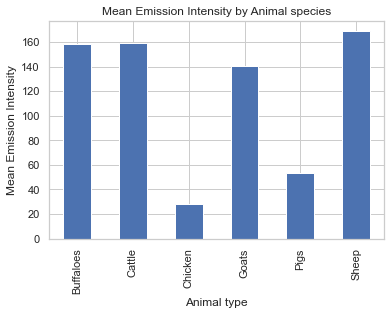

In [36]:
# Group by 'Animal species' and calculate mean emission intensity
Animal_species_mean_intensity = live_stock_subset.groupby('Animal species')['Emission Intensity (kg CO2e per kg protein)'].mean()
print(Animal_species_mean_intensity)

# Visualize mean emission intensity by region
Animal_species_mean_intensity.plot(kind='bar')
plt.xlabel('Animal type')
plt.ylabel('Mean Emission Intensity')
plt.title('Mean Emission Intensity by Animal species')
plt.show()




Production system
Aggregated              128.504545
Backyard systems         28.938636
Broilers                 32.400000
Feedlots                 72.281818
Grassland systems       182.859091
Industrial systems       57.736364
Intermediate systems     54.990909
Layers                   29.448485
Mixed systems           142.930303
Name: Emission Intensity (kg CO2e per kg protein), dtype: float64


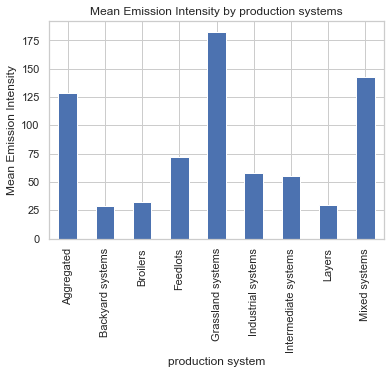

In [37]:
# Group by 'Production system' and calculate mean emission intensity
Production_system_mean_intensity = live_stock_subset.groupby('Production system')['Emission Intensity (kg CO2e per kg protein)'].mean()
print(Production_system_mean_intensity)

# Visualize mean emission intensity by region
Production_system_mean_intensity.plot(kind='bar')
plt.xlabel('production system')
plt.ylabel('Mean Emission Intensity')
plt.title('Mean Emission Intensity by production systems')
plt.show()




Commodity
Aggregated    121.760428
Eggs           22.760606
Meat          143.247619
Milk          112.110606
Name: Emission Intensity (kg CO2e per kg protein), dtype: float64


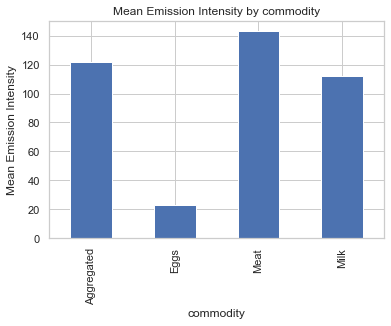

In [38]:
# Group by 'Commodity' and calculate mean emission intensity
Commodity_mean_intensity = live_stock_subset.groupby('Commodity')['Emission Intensity (kg CO2e per kg protein)'].mean()
print(Commodity_mean_intensity)

# Visualize mean emission intensity by commodity
Commodity_mean_intensity.plot(kind='bar')
plt.xlabel('commodity')
plt.ylabel('Mean Emission Intensity')
plt.title('Mean Emission Intensity by commodity')
plt.show()




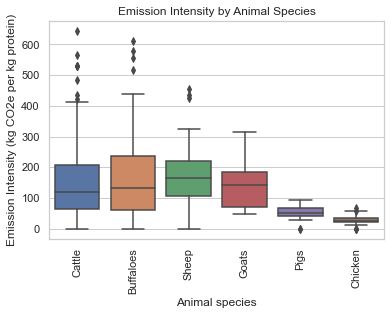

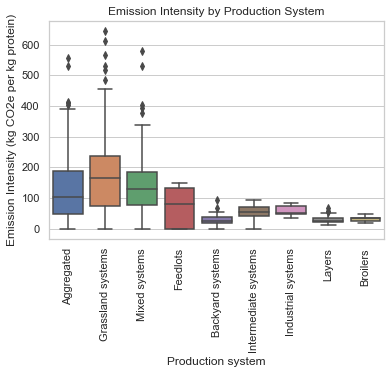

In [41]:
sns.boxplot(x='Animal species', y='Emission Intensity (kg CO2e per kg protein)', data=live_stock_subset)
plt.title('Emission Intensity by Animal Species')
plt.xticks(rotation=90)
plt.show()

sns.boxplot(x='Production system', y='Emission Intensity (kg CO2e per kg protein)', data=live_stock_subset)
plt.title('Emission Intensity by Production System')
plt.xticks(rotation=90)
plt.show()


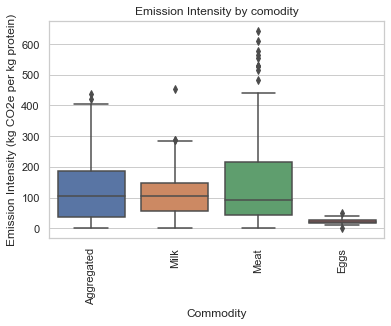

In [42]:
sns.boxplot(x='Commodity', y='Emission Intensity (kg CO2e per kg protein)', data=live_stock_subset)
plt.title('Emission Intensity by comodity')
plt.xticks(rotation=90)
plt.show()